In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot 
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

# matplotlib 한글폰트 
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False


In [14]:
### GPU 사용 확인 ###

print(f'GPU 사용가능 여부: {torch.cuda.is_available()}')
print(f'GPU 사용가능 개수 : {torch.cuda.device_count()}')
print(f'GPU 정보 반환 :  {torch.cuda.get_device_name(0)}')

### GPU 디바이스 할당 ###
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

GPU 사용가능 여부: True
GPU 사용가능 개수 : 2
GPU 정보 반환 :  NVIDIA GeForce RTX 2080 Ti
cuda:0


In [37]:
# 공통 함수 다운로드
!git clone https://github.com/wikibook/pythonlibs.git

# 공통 함수 불러오기
from pythonlibs.torch_lib1 import *

# 공통 함수 확인
print(README)

Common Library for PyTorch
Author: M. Akaishi


fatal: destination path 'pythonlibs' already exists and is not an empty directory.


In [15]:
# nn.AdaptiveAvgPool2d 정의 
p = nn.AdaptiveAvgPool2d((1,1))
print(p)

# 선형 함수의 정의 
l1 = nn.Linear(32,10)
print(l1)

AdaptiveAvgPool2d(output_size=(1, 1))
Linear(in_features=32, out_features=10, bias=True)


In [16]:
inputs = torch.randn(100, 32, 16, 16)
m1 = p(inputs)
m2 = m1.view(m1.shape[0],-1)
m3 = l1(m2)

print(m1.shape)
print(m2.shape)
print(m3.shape)

torch.Size([100, 32, 1, 1])
torch.Size([100, 32])
torch.Size([100, 10])


데이터 준비 

In [17]:
# 분류 클래스명 정의
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 분류 클래스 수는 10
n_output = len(classes)

In [18]:
# 학습 데이터 
transform_train =transforms.Compose([
    transforms.Resize(112),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
])

# 검증 데이터 
transform = transforms.Compose([
    transforms.Resize(112),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

In [19]:
# 데이터 취득용 함수 dataset

data_root = './data'

train_set = datasets.CIFAR10(
    root = data_root, train = True,
    download = True, transform = transform_train)

# 검증 데이터셋
test_set = datasets.CIFAR10(
    root = data_root, train = False, 
    download = True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [20]:
batch_size = 50 

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

ResNet-18 Model load

In [21]:
from torchvision import models 

net = models.resnet18(pretrained=True)

In [22]:
# ResNet18 모델 개요 

print(net)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [23]:
# ResNet18 모델 개요 - summary

net = net.to(device) 
summary(net, (100, 3, 112, 112))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [100, 1000]               --
├─Conv2d: 1-1                            [100, 64, 56, 56]         9,408
├─BatchNorm2d: 1-2                       [100, 64, 56, 56]         128
├─ReLU: 1-3                              [100, 64, 56, 56]         --
├─MaxPool2d: 1-4                         [100, 64, 28, 28]         --
├─Sequential: 1-5                        [100, 64, 28, 28]         --
│    └─BasicBlock: 2-1                   [100, 64, 28, 28]         --
│    │    └─Conv2d: 3-1                  [100, 64, 28, 28]         36,864
│    │    └─BatchNorm2d: 3-2             [100, 64, 28, 28]         128
│    │    └─ReLU: 3-3                    [100, 64, 28, 28]         --
│    │    └─Conv2d: 3-4                  [100, 64, 28, 28]         36,864
│    │    └─BatchNorm2d: 3-5             [100, 64, 28, 28]         128
│    │    └─ReLU: 3-6                    [100, 64, 28, 28]         --
│

In [24]:
# 변수 fc 상세 확인 

print(net.fc)
print(net.fc.in_features)

Linear(in_features=512, out_features=1000, bias=True)
512


최종 레이어 함수 교체하기 

In [33]:
torch_seed=()

# 최종 레이어 함수의 입력 차원수 확인 
fc_in_features = net.fc.in_features

# 최종 레이어 함수 교체 
net.fc = nn.Linear(fc_in_features, n_output)

In [34]:
print(net)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [35]:
net = net.to(device)
summary(net, (100,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [100, 10]                 --
├─Conv2d: 1-1                            [100, 64, 112, 112]       9,408
├─BatchNorm2d: 1-2                       [100, 64, 112, 112]       128
├─ReLU: 1-3                              [100, 64, 112, 112]       --
├─MaxPool2d: 1-4                         [100, 64, 56, 56]         --
├─Sequential: 1-5                        [100, 64, 56, 56]         --
│    └─BasicBlock: 2-1                   [100, 64, 56, 56]         --
│    │    └─Conv2d: 3-1                  [100, 64, 56, 56]         36,864
│    │    └─BatchNorm2d: 3-2             [100, 64, 56, 56]         128
│    │    └─ReLU: 3-3                    [100, 64, 56, 56]         --
│    │    └─Conv2d: 3-4                  [100, 64, 56, 56]         36,864
│    │    └─BatchNorm2d: 3-5             [100, 64, 56, 56]         128
│    │    └─ReLU: 3-6                    [100, 64, 56, 56]         --
│

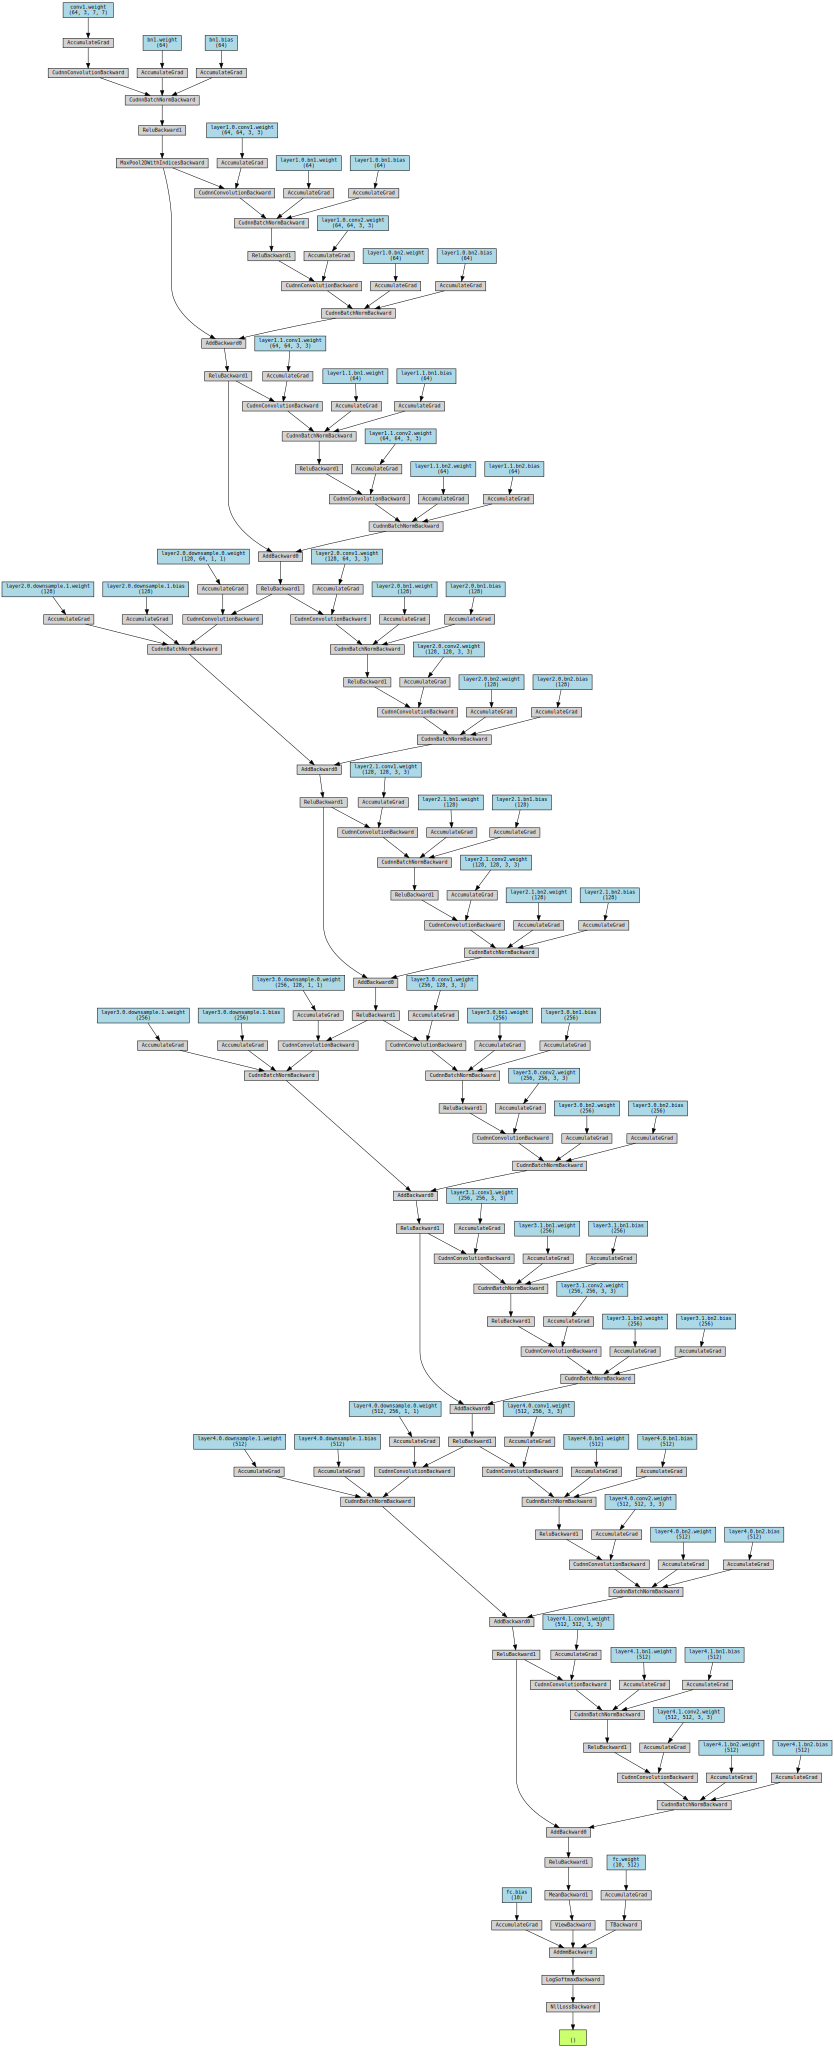

In [38]:
# 손실 계산 그래프 시각화

criterion = nn.CrossEntropyLoss()
loss = eval_loss(test_loader, device, net, criterion)
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

학습 초기 설정 

In [40]:
torch_seed=()

# 사전 학습 모델 불러오기 
# pretrained = True 로 학습을 마친 파라미터도 함께 불러오기 
net = models.resnet18(pretrained=True)

# 최종 레이어 함수 입력 차원수 확인 
fc_in_featrues = net.fc.in_features

# 최종 레이어 함수 교체 
net.fc = nn.Linear(fc_in_featrues, n_output)

# GPU 사용
net = net.to(device)

# 학습률
lr = 0.01

# 손실 함수 정의
criterion = nn.CrossEntropyLoss()

# 최적화 함수 정의
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

# history 파일 초기화 
history = np.zeros((0,5))

학습 

In [42]:
num_epochs=5
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [1/5], loss: 0.01450 acc: 0.75848 val_loss: 0.01091, val_acc: 0.84040


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [2/5], loss: 0.00854 acc: 0.85562 val_loss: 0.00612, val_acc: 0.89840


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [3/5], loss: 0.00651 acc: 0.88872 val_loss: 0.00597, val_acc: 0.90160


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [4/5], loss: 0.00532 acc: 0.90818 val_loss: 0.00533, val_acc: 0.91230


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [5/5], loss: 0.00464 acc: 0.92102 val_loss: 0.00468, val_acc: 0.92390


초기상태 : 손실 : 0.01091  정확도 : 0.84040
최종상태 : 손실 : 0.00468 정확도 : 0.92390


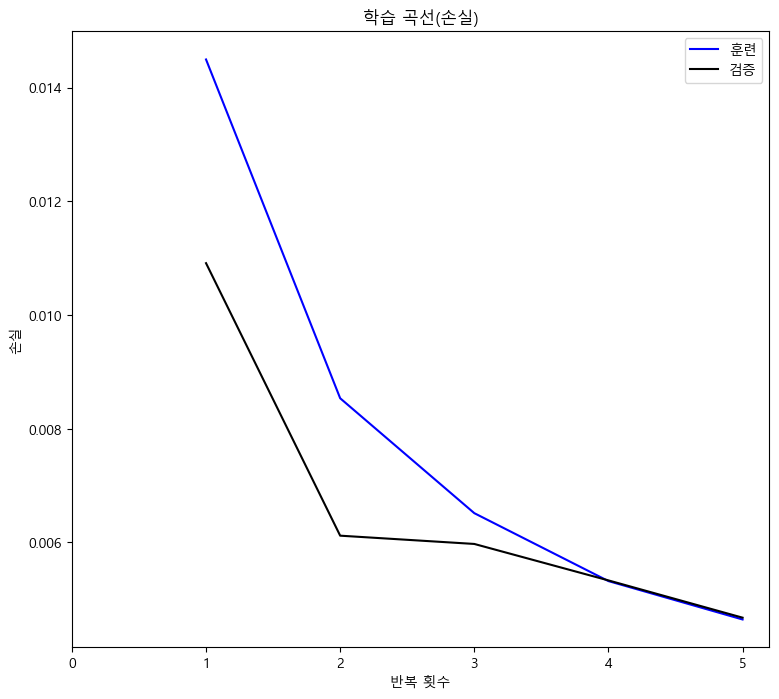

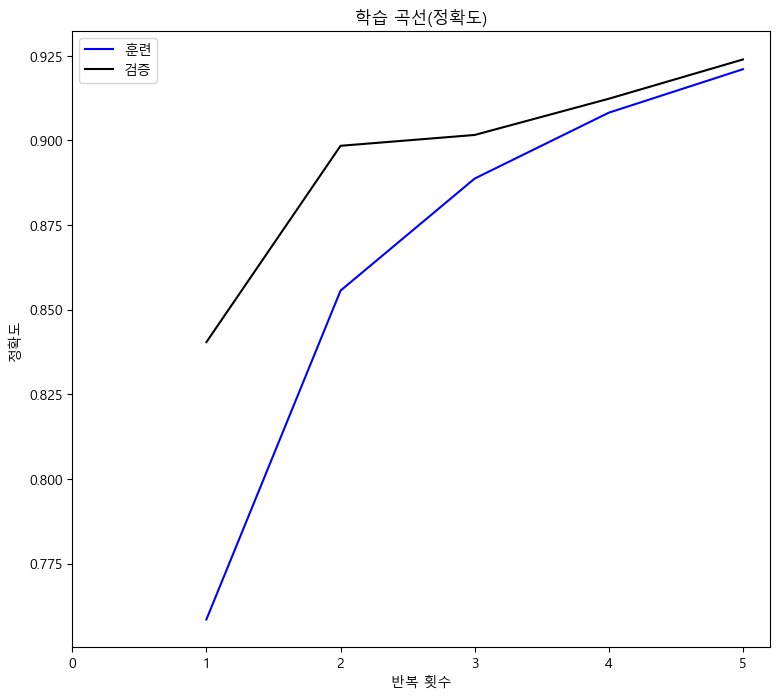

In [48]:
evaluate_history(history)

VGG-19-BN 활용하기 

In [49]:
# 모델 불러오기 
from torchvision import models 
net = models.vgg19_bn(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to C:\Users\User/.cache\torch\hub\checkpoints\vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [50]:
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [51]:
# 가장 마지막 선형 함수 
print(net.classifier[6])

Linear(in_features=4096, out_features=1000, bias=True)


최종 레이어 함수 교체 

In [52]:
torch_seed=()

# 최종 레이어 함수 교체 
in_features = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features, n_output)

# features 마지막의 MaxPool2d 제거 
net.features = net.features[:-1]

# AdaptiveAvgPool2d 제거 
net.avgpool = nn.Identity() # -> 입력과 동일한 tensor를 출력으로 내보내주는 layer 

In [53]:
net = net.to(device)
summary(net, (100, 3, 112, 112))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [100, 10]                 --
├─Sequential: 1-1                        [100, 512, 7, 7]          --
│    └─Conv2d: 2-1                       [100, 64, 112, 112]       1,792
│    └─BatchNorm2d: 2-2                  [100, 64, 112, 112]       128
│    └─ReLU: 2-3                         [100, 64, 112, 112]       --
│    └─Conv2d: 2-4                       [100, 64, 112, 112]       36,928
│    └─BatchNorm2d: 2-5                  [100, 64, 112, 112]       128
│    └─ReLU: 2-6                         [100, 64, 112, 112]       --
│    └─MaxPool2d: 2-7                    [100, 64, 56, 56]         --
│    └─Conv2d: 2-8                       [100, 128, 56, 56]        73,856
│    └─BatchNorm2d: 2-9                  [100, 128, 56, 56]        256
│    └─ReLU: 2-10                        [100, 128, 56, 56]        --
│    └─Conv2d: 2-11                      [100, 128, 56, 56]        147,

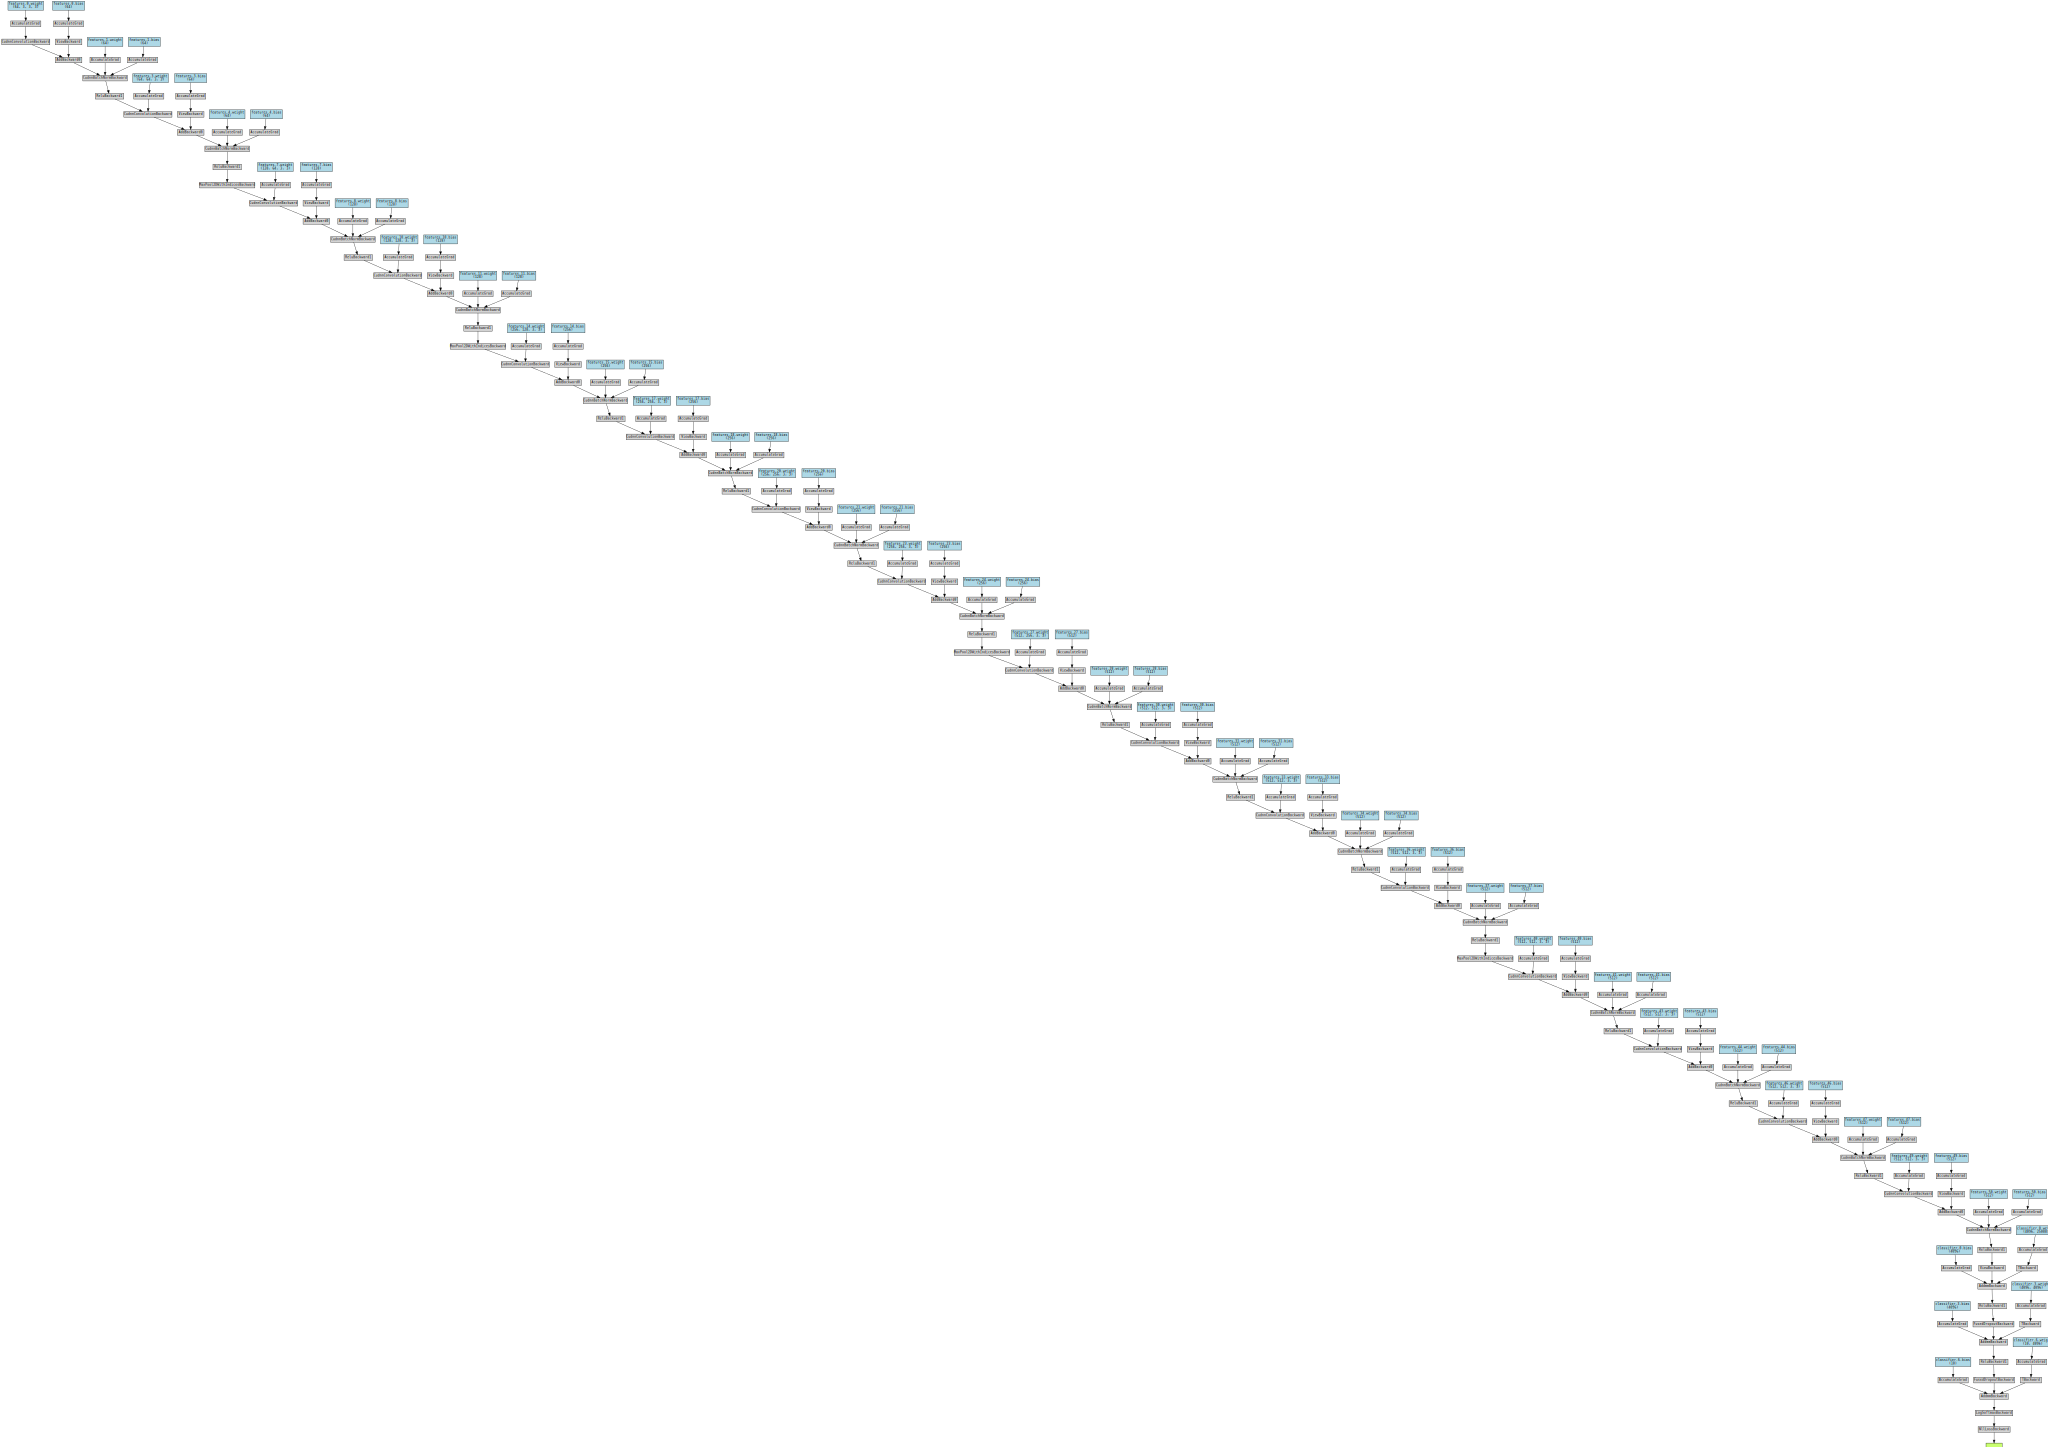

In [54]:
critertion = nn.CrossEntropyLoss()
loss = eval_loss(test_loader, device, net, criterion)
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

초기 설정

In [57]:
torch_seed=()
# < 최종 레이어 함수 교체 >
# ======================================================================
# 사전 학습 모델 불러오기 
net = models.vgg19_bn(pretrained=True)

# 최종 레이어 함수 교체
in_features = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features, n_output)

# features 마지막의 Maxpool2d 제거 
net.features = net.features[:-1]

# AdaptiveAvgPool2d 제거 
net.avgpool = nn.Identity()
# ======================================================================

# 모델을 GPU로 전송
net = net.to(device)

# 학습률
lr = 0.01

# 손실 함수 정의
criterion = nn.CrossEntropyLoss()

# 최적화 함수 정의 
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

# history 초기화 
history = np.zeros((0,5))

학습

In [58]:
num_epochs=5
history=fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [1/5], loss: 0.01096 acc: 0.81840 val_loss: 0.00591, val_acc: 0.90070


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [2/5], loss: 0.00615 acc: 0.89674 val_loss: 0.00410, val_acc: 0.92730


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [3/5], loss: 0.00476 acc: 0.92098 val_loss: 0.00414, val_acc: 0.93210


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [4/5], loss: 0.00390 acc: 0.93536 val_loss: 0.00371, val_acc: 0.93890


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [5/5], loss: 0.00339 acc: 0.94254 val_loss: 0.00345, val_acc: 0.94270


평가

초기상태 : 손실 : 0.00591  정확도 : 0.90070
최종상태 : 손실 : 0.00345 정확도 : 0.94270


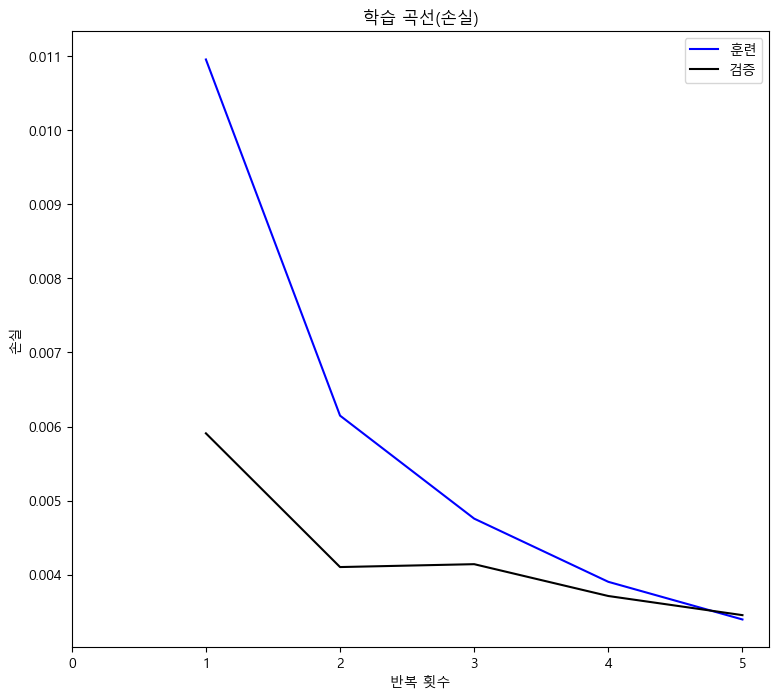

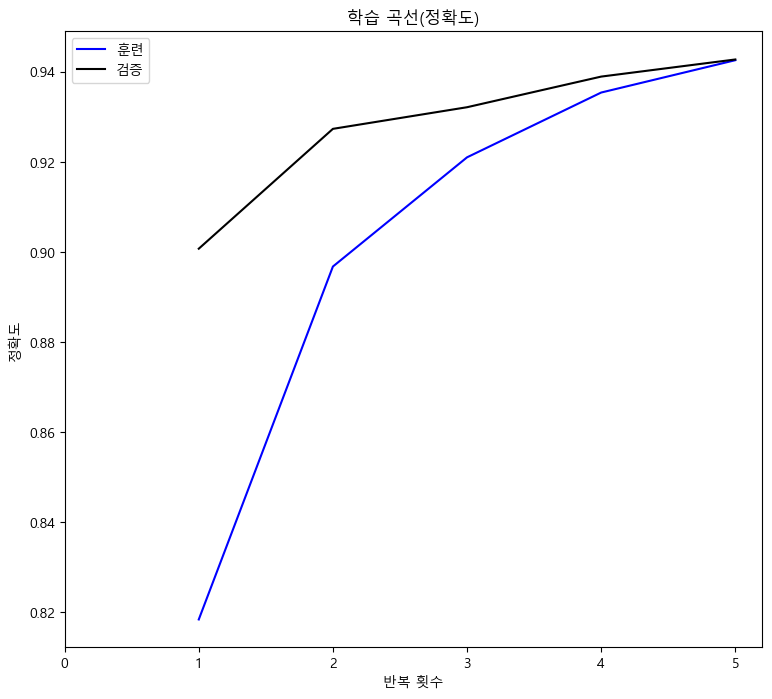

In [59]:
evaluate_history(history)

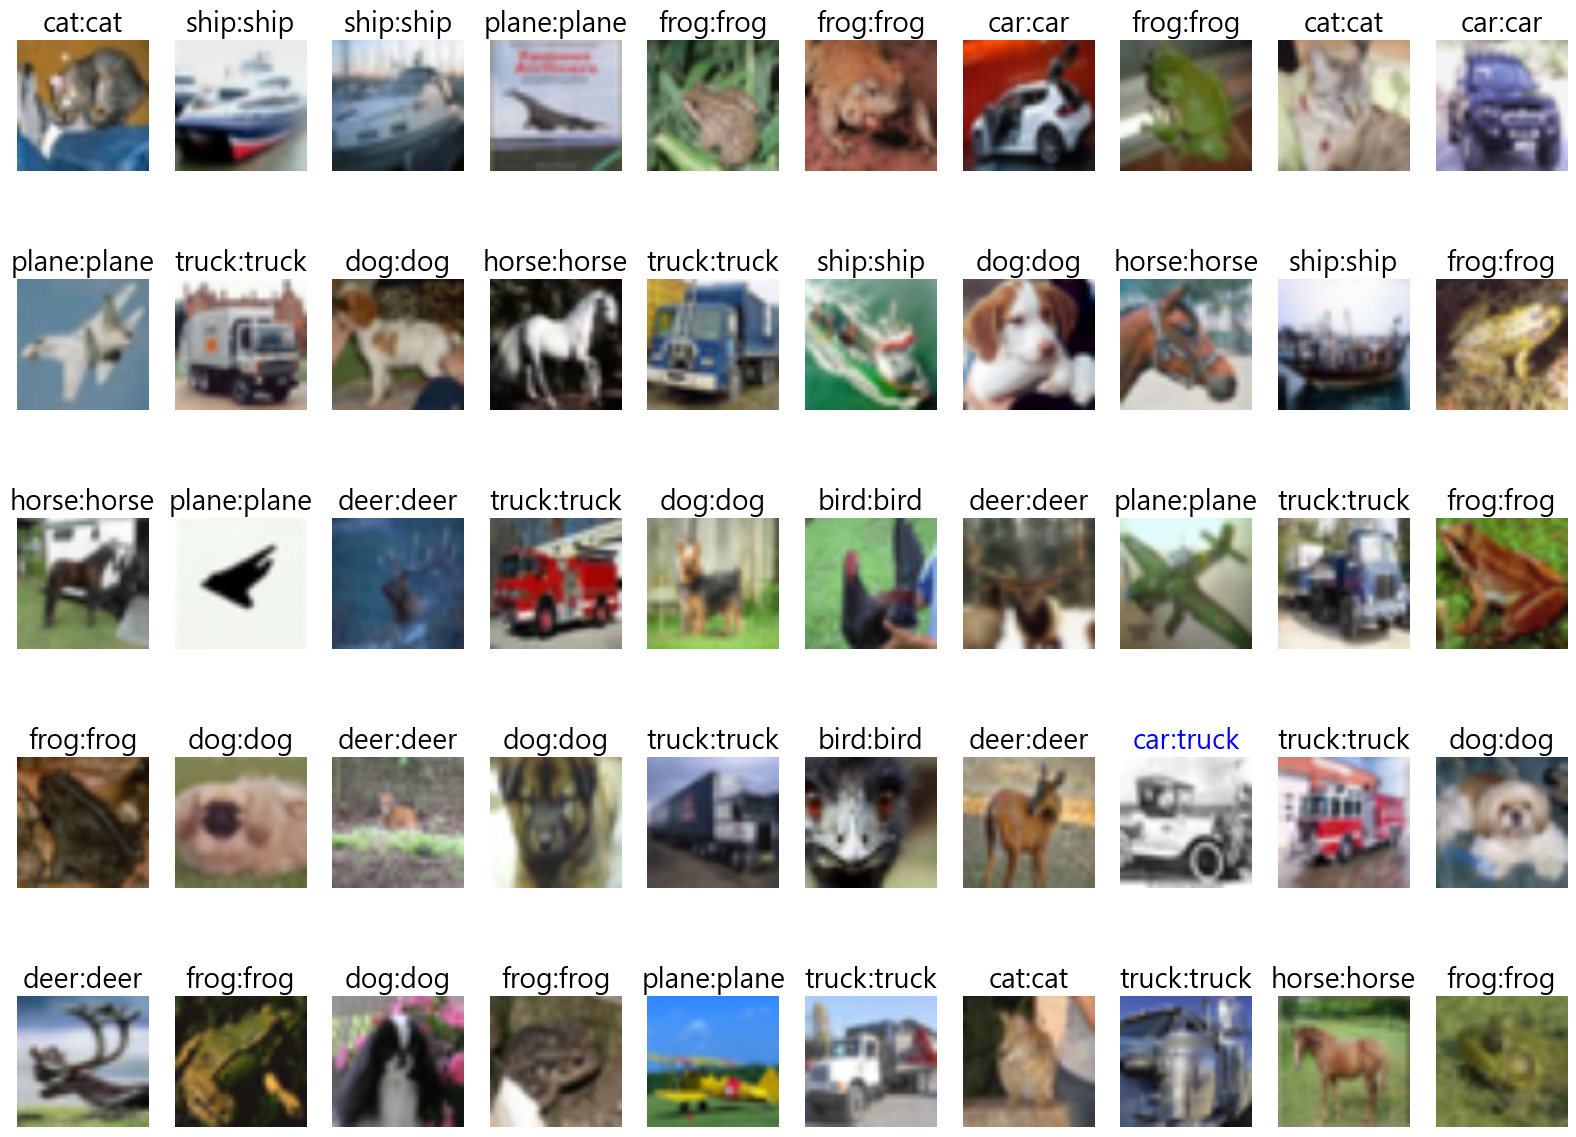

In [60]:
show_images_labels(test_loader, classes, net, device)